In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from geopy.distance import vincenty
from sklearn.decomposition import PCA

import folium
import matplotlib.colors as colors
import matplotlib.cm as cm
from folium import plugins

from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
from scipy.spatial.distance import cdist, pdist
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import copy
import json
import math
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
!pwd
from google.colab import drive
drive.mount('/gdrive')


/content
Mounted at /gdrive


In [6]:
% ls 

drive/  sample_data/


In [7]:
%cd drive/My\ Drive/Data

/content/drive/My Drive/Data


In [8]:
df_loc = pd.read_csv("small.csv")
df_loc.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,01-07-2017 00:00,01-07-2017 00:06,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,01-07-2017 00:00,01-07-2017 00:35,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,01-07-2017 00:00,01-07-2017 00:05,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,01-07-2017 00:00,01-07-2017 00:42,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,01-07-2017 00:00,01-07-2017 00:42,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [9]:
X = df_loc[['start station latitude', 'start station longitude']].values

Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X) for i in Ks]


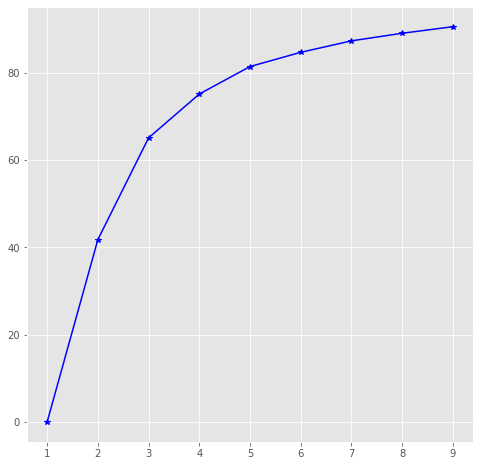

In [10]:
def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X)**2)/X.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.show()

plot_elbow(kmean, X)


In [11]:

map_clusters = folium.Map(location=[40.7128, 74.0060], zoom_start=4)
def plot_stations_map(df_loc):
  colors = ['yellow', 'orange', 'blue', 'pink']
  markers_colors = []
  for lat, lng, cluster in zip(list(df_loc['start station latitude']), list(df_loc['start station longitude']), list(df_loc['cluster'])):
           
      folium.vector_layers.CircleMarker(
          [lat, lng],
          radius=5,
          #popup=label,
          tooltip = 'Cluster ' + str(cluster),
          color=colors[cluster],
          fill=True,
          fill_color=colors[cluster],
          fill_opacity=0.9).add_to(map_clusters)


In [12]:
k = [4]
n = len(k)

for i in range(n):
    est = kmean[k[i]-1]
    df_loc['cluster'] = est.predict(X).tolist()
    plot_stations_map(df_loc)


In [13]:
map_clusters

In [14]:
maa = folium.Map(location=[40.7128, 74.0060], zoom_start=2)
maa.add_children(plugins.HeatMap(zip(list(df_loc['start station latitude']), list(df_loc['start station longitude']), list(df_loc['cluster'])), radius = 10))